In [43]:
from scipy.special import jv
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
import pandas as pd
import matplotlib as mpl
from floquet_simulations.flux_functions import *
from pathlib import Path
from matplotlib.colors import LinearSegmentedColormap
from floquet_simulations.plot_functions import PlotParams
PlotParams(fontsize=8.5)

In [44]:
omega0 = 8
alpha=1; beta=2
gaps_dir = Path().absolute().parent.parent.parent/"paper_data"/f"neighbourhood_continuous_gaps_omega={omega0},alpha={alpha},beta={beta},Amax=70.csv"
gaps_dir = Path().absolute().parent.parent.parent/"paper_data"/f"neighbourhood_gaps_omega={omega0},alpha={alpha},beta={beta},Amax=70.csv"

df_gaps = pd.read_csv(gaps_dir, index_col=False)


0.16379413152588793


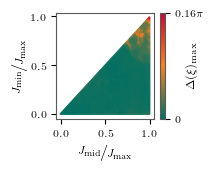

In [51]:
opening_num = "First"
delta_type = f"{opening_num}MaxDelta"#"SecondMaxDelta"
gap_type_opening = f"{opening_num}MaxPhaseOpening"
gap_type_closing = f"{opening_num}MaxPhaseClosing"
save_string = ""

max_gap =df_gaps[delta_type].max()/pi
print(max_gap)
omega0 = 8
cmap = LinearSegmentedColormap.from_list('custom hamiltonians', [ '#006F63', '#F78320', "#C30934"], N=256)
norm = mpl.colors.Normalize(vmin=0, vmax=np.round(max_gap,3)*pi)
figsize=(4,3.5)
cm_unit = 1/2.54
fig, ax = plt.subplots(figsize=(figsize[0]*cm_unit, figsize[1]*cm_unit))
sc = ax.scatter(df_gaps.CentreX, df_gaps.CentreY, c=df_gaps[delta_type], 
                norm = norm, s=1, cmap=cmap, marker=".")
ax.set_xticks([0, 0.5, 1])
ax.set_yticks([0, 0.5, 1])
ax.set_xlabel(r"$\nicefrac{J_{\mathrm{mid}}}{J_{\mathrm{max}}}$",  fontsize=12)
ax.set_ylabel(r"$\nicefrac{J_{\mathrm{min}}}{J_{\mathrm{max}}}$", rotation = 90, labelpad=3, fontsize=12)
cbar = plt.colorbar(sc, ticks=[0, max_gap*pi])
cbar.ax.set_ylabel(r"$\Delta(\xi) _{\mathrm{max}}$", rotation=90, labelpad=-13)
cbar.ax.set_yticklabels(["0", rf"{max_gap:.2f}$\pi $"])
plt.savefig(Path().absolute().parent.parent.parent/"figures"/"local_mod_paper"/"flux_on_lower_triangle.pdf", format="pdf", bbox_inches="tight")
plt.show()  